<a href="https://colab.research.google.com/github/Ron-Wu/Machine-learning-0602/blob/main/imgaug_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [410]:
import imageio
import imgaug as ia
import imgaug.augmenters as iaa
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib

%matplotlib inline

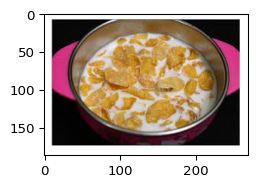

In [411]:
import imageio
import imgaug as ia
%matplotlib inline    

image = imageio.imread("/content/drive/MyDrive/aug_test/img/cereal_0106.png")

# image = np.array(image)
# print(image.shape)

ia.imshow(image)

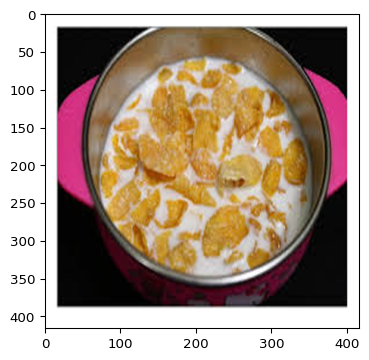

(416, 416, 3)


In [399]:
# resize = iaa.Resize({"height": 416, "width": 416})
# # resize_image = resize.augment_image(image)
# # ia.imshow(resize_image)
# image = resize.augment_image(image)

# ia.imshow(image)
# print(image.shape)

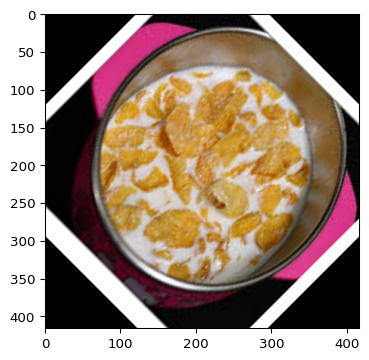

In [376]:
# # rotate = iaa.Affine(rotate=(-45,30)) # (-45,30):旋轉的幅度是從-45~30度random挑出
# rotate = iaa.Affine(rotate=45) # 單一數值極為固定方向旋轉，+:順時針 , -:逆時針
# rotate_image = rotate.augment_image(image)
# ia.imshow(rotate_image)

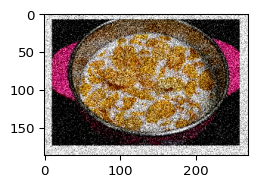

In [194]:
# # loc: 改變明暗，若單一數值(+：亮，-:暗)，若tuple則是random選取  
# # scale: 增加噪點，scale需大於0，單一數值，躁點比例，若tuple則是random選取  
# gaussian_noise = iaa.AdditiveGaussianNoise(loc=(-70, 70), 
#                                            scale=(1, 100))
# noise_image = gaussian_noise.augment_image(image)
# ia.imshow(noise_image)

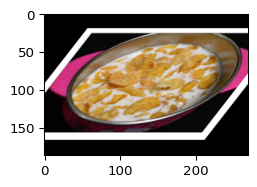

In [196]:
# # Shear: 將圖片轉斜，貌似無用
# shear = iaa.Affine(shear=(0, 40))
# shear_image = shear.augment_image(image)
# ia.imshow(shear_image)

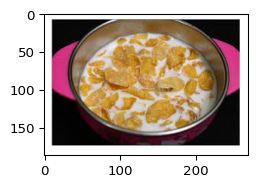

In [198]:
# # Flip: 水平翻轉圖片，p須為 0~1 之間的機率，ex: 0.5表示圖片只有50%機率會翻轉
# flip = iaa.Fliplr(p=(0.5))
# flip_image = flip.augment_image(image)
# ia.imshow(flip_image)

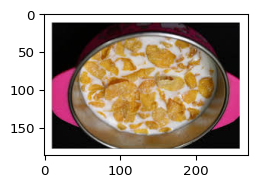

In [199]:
# # Flipud: 水平翻轉圖片，p須為 0~1 之間的機率, ex: 0.5表示圖片只有50%機率會翻轉
# flipud = iaa.Flipud(p=(1))
# flipud_image = flipud.augment_image(image)
# ia.imshow(flipud_image)

In [412]:
import os
path = r"/content/drive/MyDrive/aug_test/img"  #文件和目錄
image_names = os.listdir(path)   # 返回指定目錄下的所有文件名稱
print(image_names)

['cereal_0157.jpeg', 'cereal_0160.jpeg', 'cereal_0106.png', 'cereal_0145.png']


In [413]:
!pip install pprintpp

In [414]:
import pprint
cereal_anno_path = "/content/drive/MyDrive/aug_test/class/cereal.txt"
cereal_anno = open(cereal_anno_path)
text=[]
cereal_anno_t = cereal_anno.read().splitlines()
for line in cereal_anno_t:
  text.append(line)
pprint.pprint((text))

['cereal_0017.png 1,39,182,145,12 38,63,133,136,12',
 'cereal_0003.png 40,34,239,130,12 86,53,212,117,12',
 'cereal_0002.png 91,23,215,139,13 108,67,177,128,13',
 'cereal_0016.png 31,47,177,188,12 69,113,139,175,12',
 'cereal_0148.png 30,1,193,89,12 47,30,182,82,12',
 'cereal_0160.jpeg 34,10,223,170,12 85,51,196,144,12',
 'cereal_0028.png 34,37,94,76,12 89,77,154,121,12 137,23,197,56,12 '
 '203,55,272,94,12',
 'cereal_0014.png 32,149,131,232,12 95,8,182,105,12',
 'cereal_0015.png 26,62,177,213,12 58,139,132,202,12',
 'cereal_0001.png 8,43,210,155,12 38,76,156,142,12',
 'cereal_0029.png 69,61,196,144,12 74,77,125,124,12',
 'cereal_0161.jpeg 38,116,269,167,12',
 'cereal_0149.png 91,97,189,152,12 100,107,176,142,12',
 'cereal_0159.jpeg 47,44,226,129,12 72,53,210,108,12',
 'cereal_0005.png 20,15,115,70,12 148,13,241,70,12 276,17,369,70,12 '
 '296,47,334,64,12 169,46,217,65,12',
 'cereal_0011.png 28,29,209,97,12 78,41,166,93,12',
 'cereal_0039.png 69,4,235,168,12 90,33,217,146,12',
 'cereal

In [ ]:
for i in range(len(image_names)):

  if image_names[i] in anno:
    print(image_names[i])  # ['cereal_0157.jpeg', 'cereal_0160.jpeg', 'cereal_0106.png']
    idx = anno.index(image_names[i]) 
    # print(text[idx].split(" ")[1:])
    bbx_l = text[idx].split(" ")[1:]
    # print(text_l)
  for j in range(len(bbx_l)):
    bbx_a = bbx_l[j].split(",")
    # print(bbx_a[0])
    # print(bbx_a[1])
    # print(bbx_a[2])
    # print(bbx_a[3])
    xmin,  ymin, xmax, ymax = int(bbx_a[0]), int(bbx_a[1]), int(bbx_a[2]), int(bbx_a[3])
    bbs = BoundingBoxesOnImage([BoundingBox(x1=xmin, x2=xmax, y1=ymin, y2=ymax)], shape=image.shape)
    ia.imshow(bbs.draw_on_image(image))

In [ ]:
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage
for i in range(len(s)):
  xmin,  ymin, xmax, ymax = s[i].split(",")[:-1]
  print(xmin,  ymin, xmax, ymax)
  bbs = BoundingBoxesOnImage([BoundingBox(x1=xmin, x2=xmax, y1=ymin, y2=ymin)], shape=image.shape)
  print(type(bbs))
  # ia.imshow(bbs.draw_on_image(image))
  # ia.imshow(image)

In [ ]:
move = iaa.Affine(translate_percent={"x":0.1}, scale=0.8)
image_aug, bbs_aug = move(image=image, bounding_boxes = bbs)
ia.imshow(bbs.draw_on_image(image_aug))

### Youtube 程式碼

In [1]:
import imageio
import imgaug as ia
import imgaug.augmenters as iaa
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib

%matplotlib inline

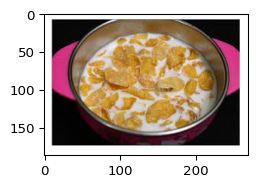

In [2]:
import imageio
import imgaug as ia
%matplotlib inline    

image = imageio.imread("/content/drive/MyDrive/aug_test/img/cereal_0106.png")
ia.imshow(image)

In [9]:
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage
a, b, c, d=50, 100, 30, 60

bbs = BoundingBoxesOnImage([BoundingBox(x1=40, x2=230, y1=25, y2=150)], shape=image.shape)
# bbs = BoundingBoxesOnImage([BoundingBox(x1=50, x2=100, y1=30, y2=60)], shape=image.shape)

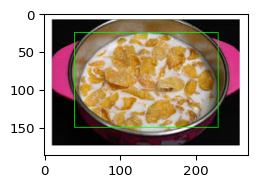

In [10]:
ia.imshow(bbs.draw_on_image(image))